In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [2]:
flight_df = sns.load_dataset("flights")

In [3]:
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


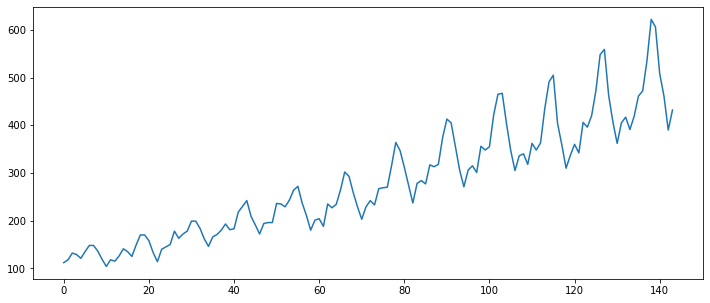

In [4]:
plt.figure(figsize=[12., 5.])
flight_df['passengers'].plot(kind='line');

In [32]:
# Convert passenter data to float32 for PyTorch
flight_df['passengers'] = flight_df['passengers'].astype(np.float32)

# Reserve last 12 months as test set:
train_data = flight_df['passengers'][:-12]
valid_data = flight_df['passengers'][-12:]

# scale data for better training and more stability
train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
valid_data = (valid_data - train_mean) / train_std

In [6]:
train_gen = TimeseriesGenerator(train_data, train_data, length=12, sampling_rate=1, batch_size=1)

In [7]:
train_X = []
train_y = []
for i in range(0, len(train_gen)):
    x, y = train_gen[i]
    train_X.append(np.array(x))
    train_y.append(y[0])

In [8]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [9]:
lstm_model = Sequential()
lstm_model.add(LSTM(108, input_shape=(12, 1)))
lstm_model.add(Dense(1))

In [10]:
lstm_model.compile(
    optimizer='SGD', loss="MSE",  metrics=['accuracy']
)

In [11]:
print(str(train_X.shape))
print(str(train_y.shape))

(120, 1, 12)
(120,)


In [12]:
train_X = train_X.reshape(120, 12, 1)

In [13]:
history = lstm_model.fit(train_X, train_y, batch_size = 5, epochs = 200)

Epoch 1/200
120/120 [==============================] - 1s 11ms/step - loss: 0.4549 - accuracy: 0.0000e+00
Epoch 2/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.0000e+00
Epoch 3/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.0000e+00
Epoch 4/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.0000e+00
Epoch 5/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.0000e+00
Epoch 6/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1681 - accuracy: 0.0000e+00
Epoch 7/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.0000e+00
Epoch 8/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1673 - accuracy: 0.0000e+00
Epoch 9/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.0000e+00
Epoch 10/200
120/120 [==============================] 

120/120 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.0000e+00
Epoch 79/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.0000e+00
Epoch 80/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.0000e+00
Epoch 81/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.0000e+00
Epoch 82/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.0000e+00
Epoch 83/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.0000e+00
Epoch 84/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.0000e+00
Epoch 85/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0880 - accuracy: 0.0000e+00
Epoch 86/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.0000e+00
Epoch 87/200
120/120 [==============================] - 0s 

120/120 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.0000e+00
Epoch 155/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.0000e+00
Epoch 156/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.0000e+00
Epoch 157/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.0000e+00
Epoch 158/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.0000e+00
Epoch 159/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.0000e+00
Epoch 160/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.0000e+00
Epoch 161/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.0000e+00
Epoch 162/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.0000e+00
Epoch 163/200
120/120 [============================

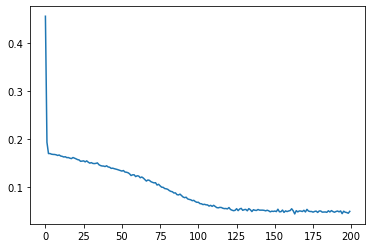

In [14]:
plt.plot(history.history['loss'])

In [15]:
train_y_pred = lstm_model.predict(train_X)
temp = []

for i in range(0, len(train_y_pred)):
    temp.append(train_y_pred[i][0])
    
train_y_pred = temp

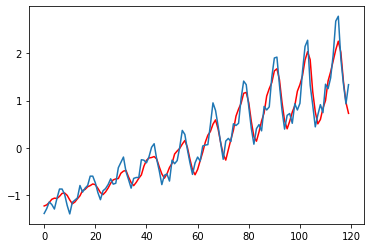

In [16]:
plt.plot(train_y_pred, color = "red")
plt.plot(train_y)

In [17]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(108, input_shape=(12, 1)))
rnn_model.add(Dense(1))

In [18]:
rnn_model.compile(
    optimizer='SGD', loss="MSE",  metrics=['accuracy']
)

In [19]:
history = rnn_model.fit(train_X, train_y, batch_size = 5, epochs = 200)

Epoch 1/200
120/120 [==============================] - 1s 6ms/step - loss: 0.1455 - accuracy: 0.0000e+00
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.0000e+00
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.0000e+00
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.0000e+00
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.0000e+00
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.0000e+00
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.0000e+00
Epoch 8/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 9/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.0000e+00
Epoch 10/200
120/120 [==============================] -

120/120 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.0000e+00
Epoch 79/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 80/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.0000e+00
Epoch 81/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 82/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 83/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 84/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.0000e+00
Epoch 85/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.0000e+00
Epoch 86/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 87/200
120/120 [==============================] - 0s 

120/120 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 155/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.0000e+00
Epoch 156/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.0000e+00
Epoch 157/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 158/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 159/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 160/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 161/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 162/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 163/200
120/120 [============================

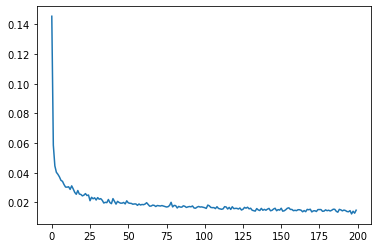

In [20]:
plt.plot(history.history['loss'])

In [21]:
train_y_pred_rnn = rnn_model.predict(train_X)
temp = []

for i in range(0, len(train_y_pred_rnn)):
    temp.append(train_y_pred_rnn[i][0])
    
train_y_pred_rnn = temp

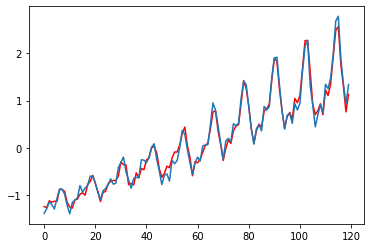

In [22]:
plt.plot(train_y_pred_rnn, color = "red")
plt.plot(train_y)

In [33]:
data = pd.concat([train_data, valid_data])

In [36]:
gen = TimeseriesGenerator(data, data, length=12, sampling_rate=1, batch_size=1)

In [37]:
X = []
Y = []
for i in range(0, len(gen)):
    x, y = gen[i]
    X.append(np.array(x))
    Y.append(y[0])

In [40]:
X = np.array(X)
Y = np.array(Y)

In [42]:
X = X.reshape(132, 12, 1)

In [43]:
y_pred_rnn = rnn_model.predict(X)
temp = []

for i in range(0, len(y_pred_rnn)):
    temp.append(y_pred_rnn[i][0])
    
y_pred_rnn = temp

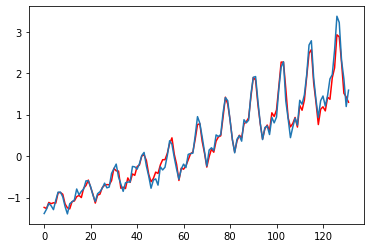

In [47]:
plt.plot(y_pred_rnn, color = "red")
plt.plot(Y)

In [48]:
y_pred_lstm = lstm_model.predict(X)
temp = []

for i in range(0, len(y_pred_lstm)):
    temp.append(y_pred_lstm[i][0])
    
y_pred_lstm = temp

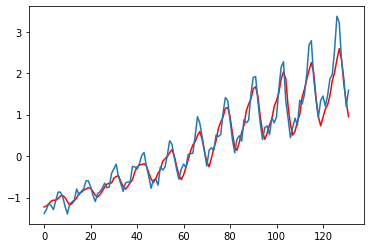

In [50]:
plt.plot(y_pred_lstm, color = "red")
plt.plot(Y)